#### Borroto_Module1_MicroProject 

In [25]:
from pathlib import Path
import math
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pylab as plt
%matplotlib inline

In [43]:
dfraw = pd.read_csv("C:\\Users\\britt\\heart_disease.csv")

In [3]:
#Review df column names, non-null count and data types
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##### The dataframe contains 918 rows and 12 columns 
##### The dataframe does not have any null values 

In [4]:
#Verify there are no spaces in the coloumn names 
dfraw.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

##### There are no spaces in the column names 

In [44]:
# Remove any duplicate rows, if they exist
dfraw.drop_duplicates(inplace=True)
print("\nData after removing duplicates:")
print(dfraw.info())


Data after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


##### The dataframe does not have any duplicate rows

In [6]:
#reviewing the values of the df
print(dfraw)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

##### The dataframe contains characters and numeric values, with and without decimals
##### The dataframe contains categorized values for Sex, ChestPainType, RestingECG and ST_Slope
##### The dataframe has numeric values for Age, Resting BP, Cholesterol, MaxHR, and Oldpeak

In [7]:
#this method `describe` prints common statistics 
dfraw.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##### The numeric values have a minimum value of -2.6 for Oldpeak
##### The dataframe contains binary values for FastingBS, ExerciseAngina, and HeatDisease

In [45]:
#map the binary values of the datframe
dfraw["Sex"] = dfraw["Sex"].map({"M": 1, "F": 0})
print(dfraw)

     Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172     

In [46]:
#map the binary values of the datframe
dfraw["ExerciseAngina"] = dfraw["ExerciseAngina"].map({"Y": 1, "N": 0})
print(dfraw)

     Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172    

In [47]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [48]:
#map ChestPainType values
dfraw["ChestPainType"] = dfraw["ChestPainType"].map({"ASY": 1, "ATA": 0, "NAP": 0, "TA": 1})
print(dfraw)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1              0        140          289          0     Normal   
1     49    0              0        160          180          0     Normal   
2     37    1              0        130          283          0         ST   
3     48    0              1        138          214          0     Normal   
4     54    1              0        150          195          0     Normal   
..   ...  ...            ...        ...          ...        ...        ...   
913   45    1              1        110          264          0     Normal   
914   68    1              1        144          193          1     Normal   
915   57    1              1        130          131          0     Normal   
916   57    0              0        130          236          0        LVH   
917   38    1              0        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0 

In [49]:
#map ST_Slope values
dfraw["ST_Slope"] = dfraw["ST_Slope"].map({"Down": 1, "Flat": 1, "Up": 0})
print(dfraw)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1              0        140          289          0     Normal   
1     49    0              0        160          180          0     Normal   
2     37    1              0        130          283          0         ST   
3     48    0              1        138          214          0     Normal   
4     54    1              0        150          195          0     Normal   
..   ...  ...            ...        ...          ...        ...        ...   
913   45    1              1        110          264          0     Normal   
914   68    1              1        144          193          1     Normal   
915   57    1              1        130          131          0     Normal   
916   57    0              0        130          236          0        LVH   
917   38    1              0        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0

In [50]:
#map Cholesterol ranges from 0- 240 = 0 for normal 241 - 603 = 1 for high
dfraw["Cholesterol"] = dfraw["Cholesterol"].apply(lambda x: 0 if 0 <= x <= 240 else 1)
print(dfraw)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1              0        140            1          0     Normal   
1     49    0              0        160            0          0     Normal   
2     37    1              0        130            1          0         ST   
3     48    0              1        138            0          0     Normal   
4     54    1              0        150            0          0     Normal   
..   ...  ...            ...        ...          ...        ...        ...   
913   45    1              1        110            1          0     Normal   
914   68    1              1        144            0          1     Normal   
915   57    1              1        130            0          0     Normal   
916   57    0              0        130            0          0        LVH   
917   38    1              0        138            0          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0

#### Borroto_Module2_MicroProject 

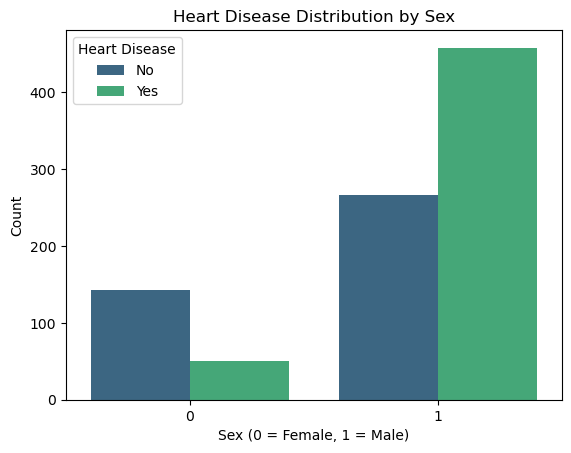

In [36]:
#bar chart of Heart Disease occurrences by Sex
sns.countplot(x='Sex', hue='HeartDisease', data=dfraw, palette='viridis')

plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.title("Heart Disease Distribution by Sex")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

##### This Seaborn count plot visualizes the distribution of Heart Disease occurrences across Sex (Male/Female). 

##### X-axis (Sex) → Represents Female (0) versus Male (1). 
##### Y-axis (Count) → Visualizes how many people are in each group. 
##### Bar Colors (Heart Disease: Yes versus No) → Differentiates between the presence or absence of heart disease. 

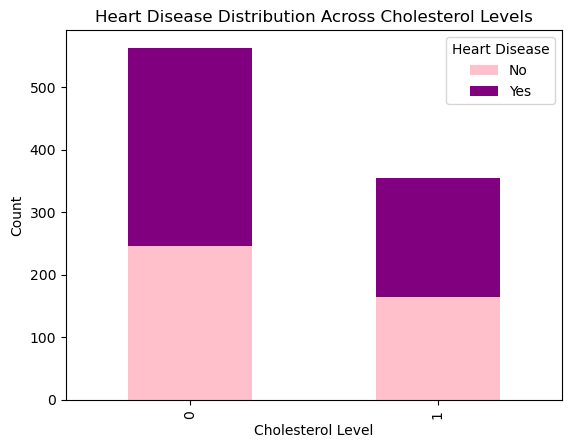

In [37]:
#group data by Cholesterol and Heart Disease and count occurrences
df_grouped = dfraw.groupby(['Cholesterol', 'HeartDisease']).size().unstack()

#plot bar chart
df_grouped.plot(kind='bar', stacked=True, color=['pink', 'purple'])

plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.title("Heart Disease Distribution Across Cholesterol Levels")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

##### This stacked bar chart using Matplotlib helps visualize the distribution of Heart Disease occurrences across different Cholesterol levels.

##### X-axis (Cholesterol Level) → Represents different Cholesterol levels in the dataset. 
##### Y-axis (Count) → Visualizes how many individuals fall into each Cholesterol category. 
##### Stacked Bars (Heart Disease: Yes versus No) → Differentiates individuals with and without Heart Disease within each Cholesterol level. 

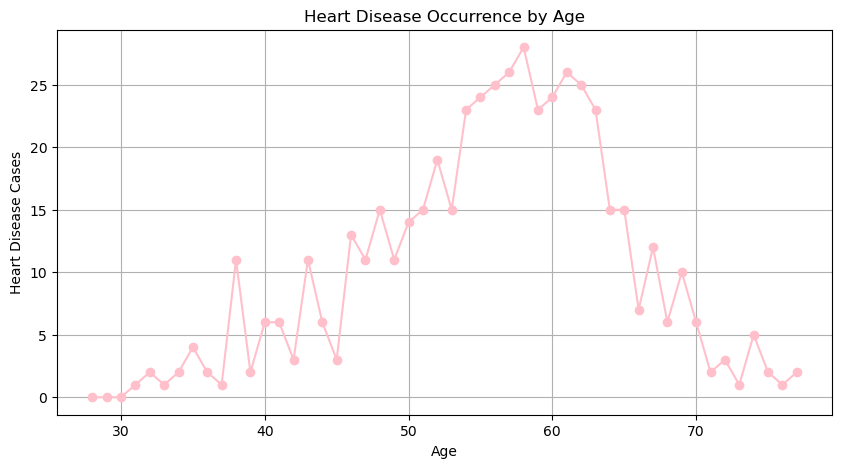

In [38]:
#group by Age and count the occurrences of Heart Disease
df_grouped = dfraw.groupby("Age")["HeartDisease"].sum()

#plot line chart
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-", color="pink")

plt.xlabel("Age")
plt.ylabel("Heart Disease Cases")
plt.title("Heart Disease Occurrence by Age")
plt.grid(True)
plt.show()

##### This line chart visualizes the distribution of Heart Disease occurrences across different ages using Matplotlib.

##### X-axis (Age) → Represents different age groups in the dataset. 
##### Y-axis (Heart Disease Cases) → Visualizes the total count of individuals diagnosed with heart disease at each age. 
##### Line Plot (Pink Line) → Illustrates the trend of Heart Disease prevalence across ages. 

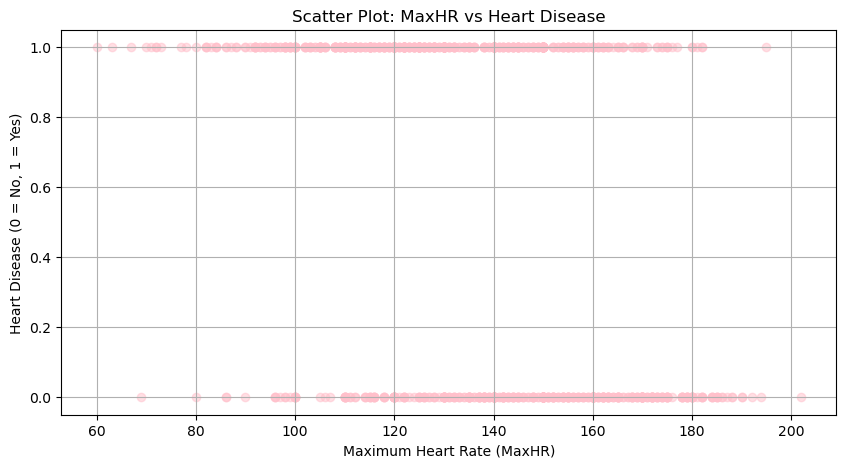

In [40]:
# scatter plot of MaxHR vs Heart Disease
plt.figure(figsize=(10, 5))
plt.scatter(dfraw['MaxHR'], dfraw['HeartDisease'], alpha=0.5, c='pink')

plt.xlabel("Maximum Heart Rate (MaxHR)")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.title("Scatter Plot: MaxHR vs Heart Disease")
plt.grid(True)
plt.show()

##### This scatter plot visually represents the relationship between Maximum Heart Rate (MaxHR) and Heart Disease occurrence using Matplotlib.

##### X-axis (MaxHR) → Displays the Maximum Heart Rate for individuals. 
##### Y-axis (HeartDisease) → Represents whether an individual has Heart Disease (0 = No, 1 = Yes). 
##### alpha=0.5 → Controls transparency, making overlapping points easier to see. 
##### 'pink' → Colors the points pink for clear visibility. 

In [41]:
import plotly.express as px

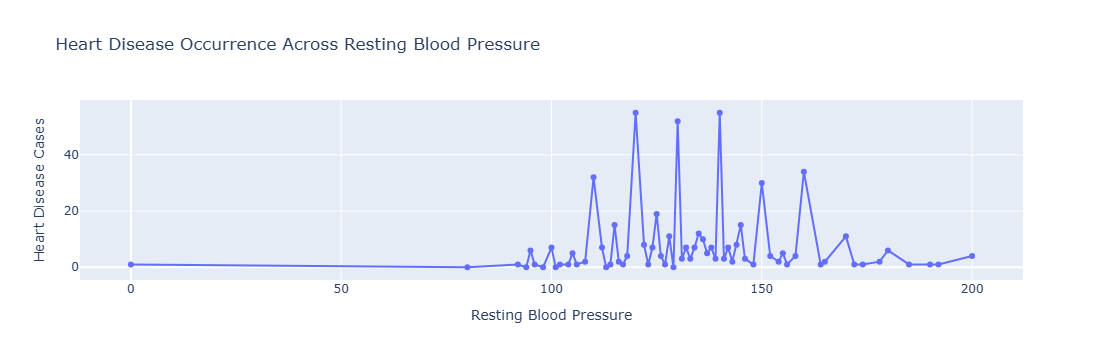

In [51]:
#group by RestingBP and count the occurrences of Heart Disease
df_grouped = dfraw.groupby("RestingBP")["HeartDisease"].sum().reset_index()

#create line chart
fig = px.line(df_grouped, x="RestingBP", y="HeartDisease", markers=True,
              title="Heart Disease Occurrence Across Resting Blood Pressure",
              labels={"RestingBP": "Resting Blood Pressure", "HeartDisease": "Heart Disease Cases"})
fig.show()

##### This Plotly line chart visualizes the relationship between Resting Blood Pressure (RestingBP) and Heart Disease occurrences.
##### X-axis (RestingBP) → Displays different Resting Blood Pressure levels. 
##### Y-axis (HeartDisease) → Shows the total number of individuals diagnosed with Heart Disease at each blood pressure level. 

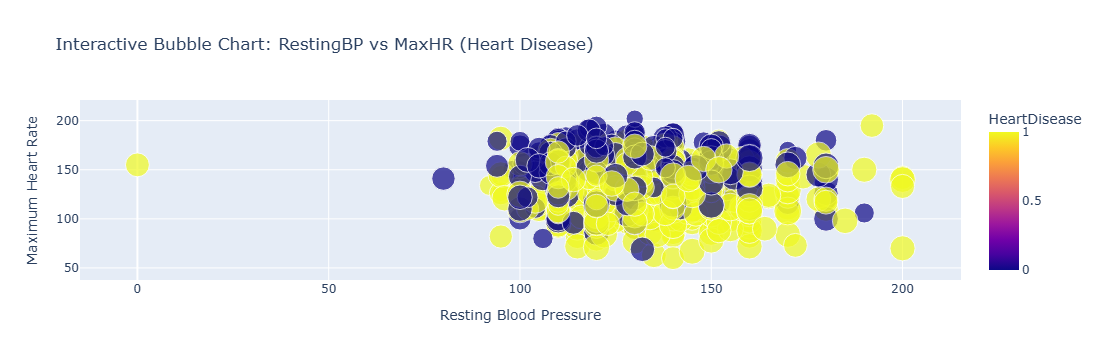

In [52]:
# create a Bubble Chart using RestingBP, MaxHR, and Heart Disease
fig = px.scatter(dfraw, x="RestingBP", y="MaxHR", size="Age", color="HeartDisease",
                 hover_name="HeartDisease", title="Interactive Bubble Chart: RestingBP vs MaxHR (Heart Disease)",
                 labels={"RestingBP": "Resting Blood Pressure", "MaxHR": "Maximum Heart Rate", "Age": "Age"})
fig.show()

##### This Plotly Bubble Chart visualizes the relationship between Resting Blood Pressure (RestingBP), Maximum Heart Rate (MaxHR), Age, and Heart Disease occurrence in an interactive format.

##### X-axis (RestingBP) → Represents Resting Blood Pressure values. 
##### Y-axis (MaxHR) → Displays Maximum Heart Rate for individuals. 
##### Bubble Color (HeartDisease) → Different colors indicate Heart Disease occurrence (0 = No, 1 = Yes). 

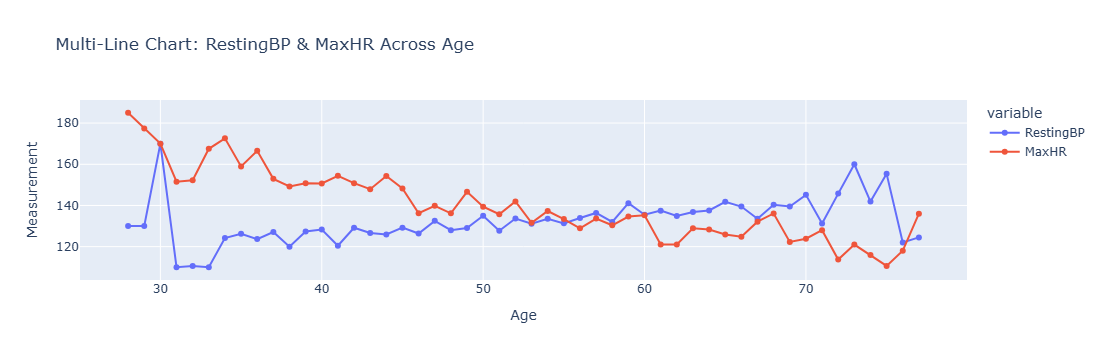

In [54]:
# group data by Age and compute average RestingBP & MaxHR
df_grouped = dfraw.groupby("Age").agg({"RestingBP": "mean", "MaxHR": "mean"}).reset_index()

# create multi-line chart
fig = px.line(df_grouped, x="Age", y=["RestingBP", "MaxHR"], 
              title="Multi-Line Chart: RestingBP & MaxHR Across Age",
              labels={"Age": "Age", "value": "Measurement"},
              line_dash_sequence=["solid", "dash"],
              markers=True)
fig.show()

##### This multi-line chart using Plotly visualizes the trend of Resting Blood Pressure (RestingBP) and Maximum Heart Rate (MaxHR) across different ages.

##### X-axis: Age (Shows age progression) 
##### Y-axis: Two separate lines: RestingBP and MaxHR 

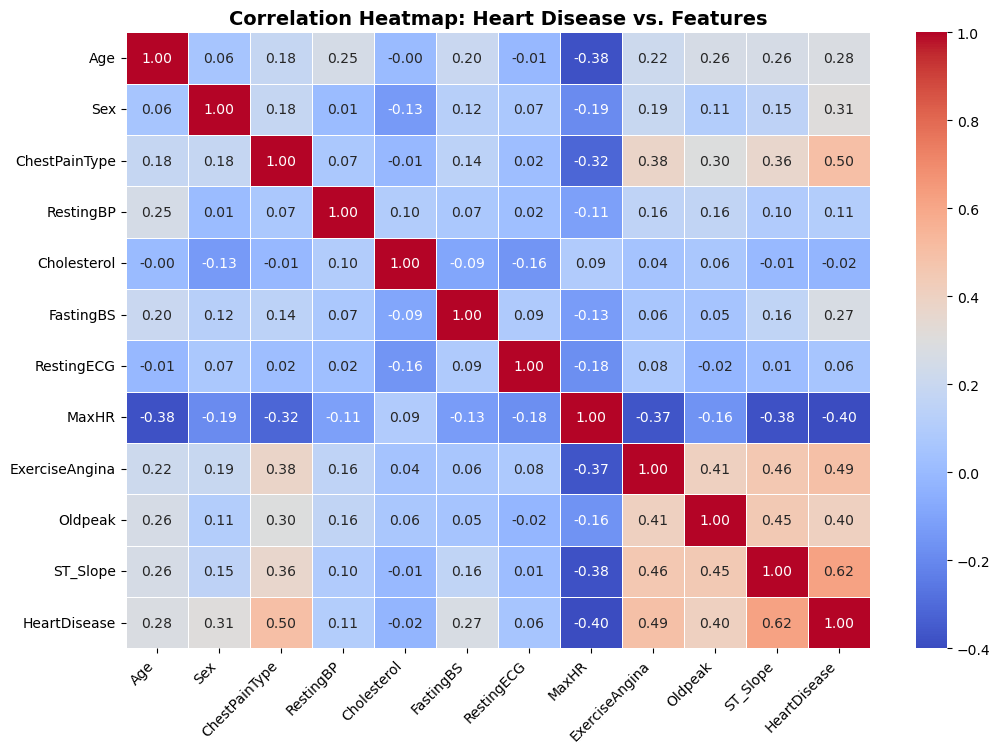

In [60]:
#convert categorical variables to numeric where necessary
dfraw_encoded = dfraw.copy()
dfraw_encoded["RestingECG"] = dfraw_encoded["RestingECG"].astype("category").cat.codes

#compute the correlation matrix
corr_matrix = dfraw_encoded.corr()

#create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#adjust labels and title
plt.title("Correlation Heatmap: Heart Disease vs. Features", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

##### This is a correlation heatmap using Seaborn to analyze how different features relate to Heart Disease.

##### Strong positive correlation (closer to 1.0) → Indicates higher likelihood of heart disease. 
##### Strong negative correlation (closer to -1.0) → Suggests inverse relationship with heart disease. 